In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %inline matplotlib
os.chdir(r"C:\Users\MANDY\Desktop\dataset")

In [2]:
df = pd.read_csv("train_csv (1).csv",index_col=['time'], parse_dates=['time'])

In [3]:
df.drop('id', axis = 1, inplace= True)

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.shape

(80, 1)

In [5]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df['feature'])

Results of Dickey-Fuller Test:
Test Statistic                -5.945866e+00
p-value                        2.205049e-07
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


In [9]:
## source = ADF (Augmented Dickey Fuller) Test
##https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

In [6]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)
kpss_test(df['feature'])

Results of KPSS Test:
Test Statistic            0.282677
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


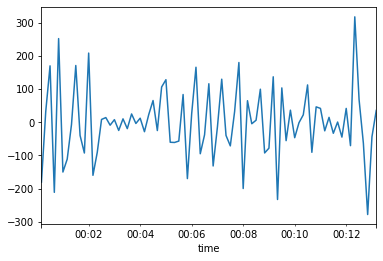

In [7]:
# Applying differencing on our series and plotting the results:
df['feature_diff'] = df['feature'] - df['feature'].shift(1)
df['feature_diff'].dropna().plot()
plt.show()

In [11]:
df.head(10)

,feature,feature_diff
time,,
2019-03-19 00:00:00,NaN,NaN
2019-03-19 00:00:10,NaN,-180.04
2019-03-19 00:00:20,NaN,32.60
2019-03-19 00:00:30,22.78,170.22
2019-03-19 00:00:40,-8.23,-211.05
2019-03-19 00:00:50,211.55,252.38
2019-03-19 00:01:00,-108.50,-149.83
2019-03-19 00:01:10,-8.51,-111.06
2019-03-19 00:01:20,-267.47,-6.58


In [9]:
n=3
df['feature'] = df['feature'] - df['feature'].shift(n)

C:\Users\MANDY\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


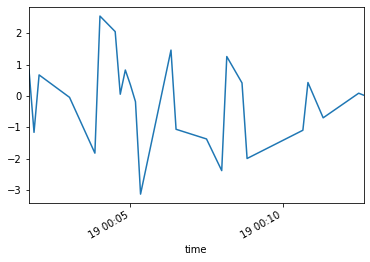

In [22]:
import numpy as np
df['feature_log'] = np.log(df['feature'])
df['feature_log_diff'] = df['feature_log'] - df['feature_log'].shift(1)
df['feature_log_diff'].dropna().plot()

In [23]:
df.head()

,feature,feature_diff,feature_log,feature_log_diff
time,,,,
2019-03-19 00:00:00,NaN,NaN,NaN,NaN
2019-03-19 00:00:10,NaN,-180.04,NaN,NaN
2019-03-19 00:00:20,NaN,32.60,NaN,NaN
2019-03-19 00:00:30,22.78,170.22,3.125883,NaN
2019-03-19 00:00:40,-8.23,-211.05,NaN,NaN


In [24]:
df['feature_diff']

time
2019-03-19 00:00:00       NaN
2019-03-19 00:00:10   -180.04
2019-03-19 00:00:20     32.60
2019-03-19 00:00:30    170.22
2019-03-19 00:00:40   -211.05
                        ...  
2019-03-19 00:12:30     68.29
2019-03-19 00:12:40    -62.93
2019-03-19 00:12:50   -277.88
2019-03-19 00:13:00    -43.63
2019-03-19 00:13:10     35.84
Name: feature_diff, Length: 80, dtype: float64